In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd

In [2]:
files=glob.glob("/kaggle/input/hotdognothotdog/hotdog-nothotdog/train/hotdog/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("/kaggle/input/hotdognothotdog/hotdog-nothotdog/train/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [3]:
files=glob.glob("/kaggle/input/hotdognothotdog/hotdog-nothotdog/test/hotdog/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("/kaggle/input/hotdognothotdog/hotdog-nothotdog/test/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [4]:
print("TrainData ",len(TrainData))
print("TrainData ",len(TestData))

TrainData  3000
TrainData  644


In [5]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

**Model**

In [6]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(128,128,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer ='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

2023-01-11 03:00:33.473707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 03:00:33.565816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 03:00:33.566648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-11 03:00:33.568686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2023-01-11 03:00:39.164568: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


30/30 [==============================] - 8s 17ms/step - loss: 0.6944 - accuracy: 0.5020
Epoch 2/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6919 - accuracy: 0.5223
Epoch 3/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6854 - accuracy: 0.5703
Epoch 4/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6485 - accuracy: 0.6270
Epoch 5/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6298 - accuracy: 0.6563
Epoch 6/50
30/30 [==============================] - 0s 16ms/step - loss: 0.6433 - accuracy: 0.6470
Epoch 7/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6128 - accuracy: 0.6750
Epoch 8/50
30/30 [==============================] - 0s 15ms/step - loss: 0.6120 - accuracy: 0.6713
Epoch 9/50
30/30 [==============================] - 0s 15ms/step - loss: 0.5862 - accuracy: 0.6910
Epoch 10/50
30/30 [==============================] - 0s 15ms/step - loss: 0.5916 - accuracy: 0.6810
Epoch 11/50
30/30 [=

In [7]:
model.evaluate(Test_X,Test_Y)

21/21 [==============================] - 0s 7ms/step - loss: 0.6462 - accuracy: 0.7733


[0.6462216377258301, 0.7732919454574585]

In [8]:
Predictions = model.predict(Test_X)

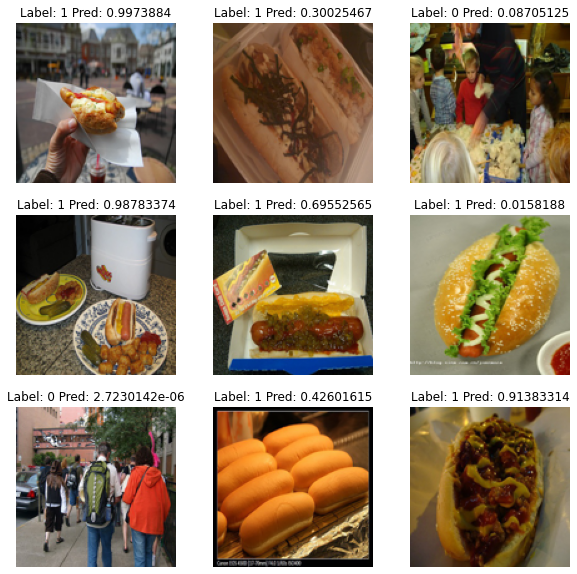

In [9]:
plt.figure(figsize=(10, 10))
a = 95
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")